In [55]:
import numpy as np
import sxs
import scipy
import gw_eccentricity
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, "./tools")
import loading
import decomposition
from importlib import reload
reload(loading)
reload(decomposition)

<module 'decomposition' from '/urania/u/pjn/gitrepos/EccentricWaveformDecomposition/./tools/decomposition.py'>

In [56]:
IDs = ["04", "35", "84"]
N_runs = np.size(IDs)
extrapolation_order = 2
project = "SurveyMeanAno_v2"
wfs, metadata, horizon = loading.LoadData(IDs, extrapolation_order, project)
h22 = loading.RestrictTo22and20Mode(wfs, IDs)
h22_total = loading.CutJunk(h22, IDs, junk_time=500)
h22 = loading.RestrictToFirstPeriastron(h22, IDs)
h22 = loading.RestrictToInspiral(h22, IDs)
h22 = loading.Align(h22, IDs)
h22 = loading.AddQCData(h22)
h22 = decomposition.AddMeanAnomalyDomain(h22, IDs, periastron_definition="QC")

Text(0, 0.5, 'A22')

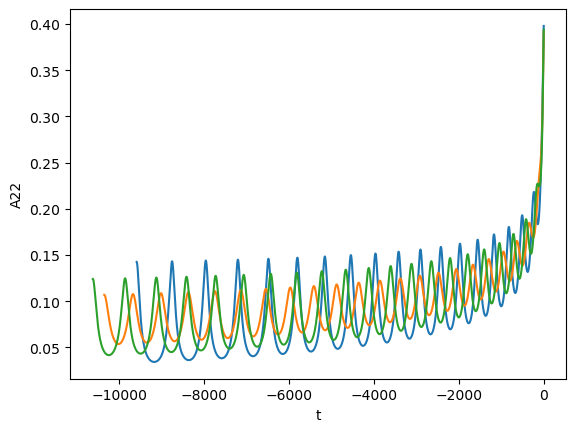

In [57]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], np.abs(h22[IDs[k]]["h22"]))
plt.xlabel("t")
# plt.plot(h22["QC"]["t"], np.abs(h22["QC"]["h22"]))
plt.ylabel("A22")

In [58]:
A22_QC = np.abs(h22["QC"]["h22"])
t_QC = h22["QC"]["t"]
A22_QC_interp = scipy.interpolate.interp1d(t_QC, A22_QC)

(-100.0, 0.0)

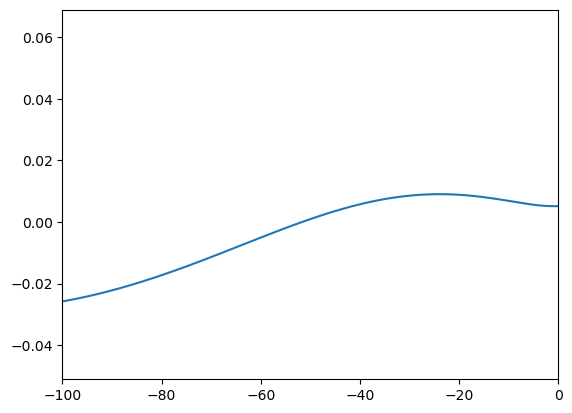

In [59]:
plt.plot(h22[IDs[0]]["t"], np.abs(h22[IDs[0]]["h22"])-A22_QC_interp(h22[IDs[0]]["t"]))
plt.xlim(-100, 0)

(-1000.0, 0.0)

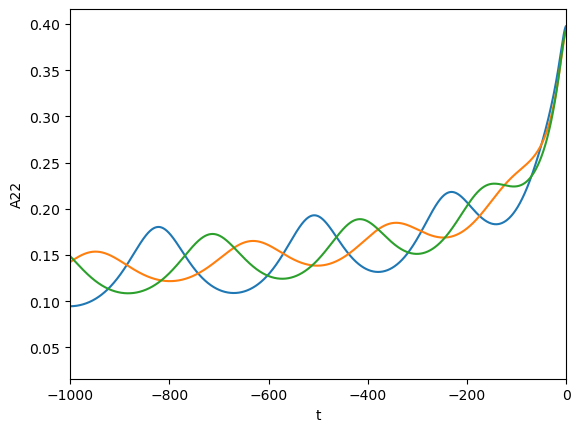

In [60]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], np.abs(h22[IDs[k]]["h22"]))
plt.xlabel("t")
plt.ylabel("A22")
plt.xlim(-1000, 0)

Text(0, 0.5, '$\\ell$')

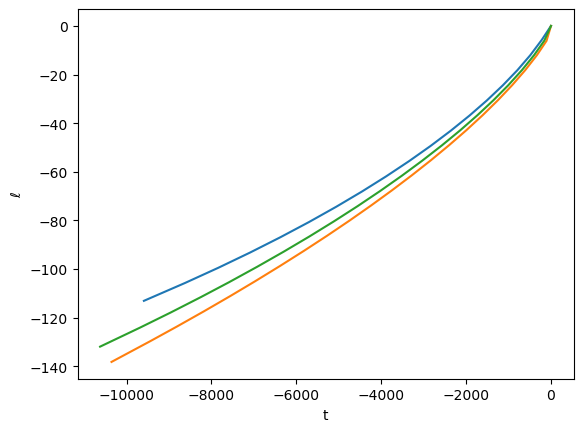

In [61]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["t"], h22[IDs[k]]["MeanAno"])
plt.xlabel("t")
plt.ylabel("$\ell$")

Text(0, 0.5, 'A22')

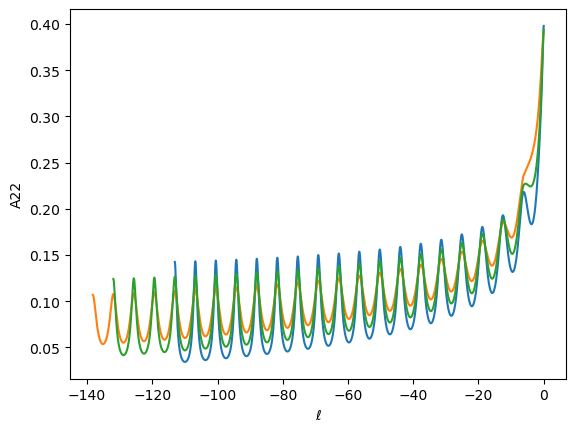

In [62]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]))
plt.xlabel("$\ell$")
plt.ylabel("A22")

(-6.283185307179586, 0.0)

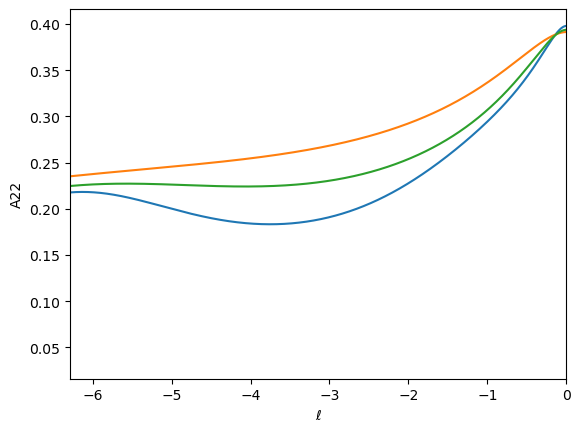

In [63]:
for k in range(N_runs):
    plt.plot(h22[IDs[k]]["MeanAno"], np.abs(h22[IDs[k]]["h22"]))
plt.xlabel("$\ell$")
plt.ylabel("A22")
plt.xlim(-2*np.pi, 0)